# Lab 3 - Visualization

Last update: 01/11/2023

- Name: Võ Đức Lợi
- Student ID: 20120524

***

## Work and submission guidelines

**Work on your assignment**

- You will do your assignment directly in this notebook. First, fill in your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer when I was a senior student
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: ...
    - Total Cases: ...
    - New Cases: ...
    - Total Deaths: ...
    - New Deaths: ...
    - Total Recovered: ...
    - Active Cases: ...
    - Critical Cases: ...
    - Total Tests: ...
    - Population: ...

- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
# raise NotImplementedError('not implemented')
df = df.drop(['New Cases', 'New Deaths', 'Critical Cases'], axis=1)
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
# TODO: convert data to integer. if the converter returns error, leave it a None
# raise NotImplementedError('not implemented')
columns = df.iloc[:, 1:].columns
df[columns] = df[columns].replace({'\D': ''}, regex=True)
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

- Chúng ta chỉ mới chuyển các dữ liệu ở các cột phù hợp thành dữ liệu số, trong đó các giá trị mà chứa các kí tự không phải số (ví dụ như giá trị rỗng) sẽ được thay thế bằng NaN trong quá trình chuyển đổi sang kiểu dữ liệu số.
- Các giá trị NaN vẫn được coi là giá trị bị thiếu, nên tiếp theo chúng ta phải xử lý giá trị bị thiếu

In [6]:
# TODO: fill in the missing data with median value
# raise NotImplementedError('not implemented')
non_object_cols = df.select_dtypes(exclude='object').columns
df[non_object_cols] = df[non_object_cols].fillna(df[non_object_cols].median())
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?
- Khi xử lý dữ liệu thiếu, các giá trị được điền vào các ô trống có thể là số thực, dẫn đến việc cột chứa các giá trị số nguyên ban đầu sau khi điền giá trị thiếu sẽ trở thành cột có kiểu dữ liệu số thực (float64).
- NaN là một giá trị đặc biệt trong kiểu dữ liệu số thực, và khi có ít nhất một giá trị NaN trong một cột, kiểu dữ liệu của cột đó sẽ tự động được chuyển đổi sang kiểu dữ liệu số thực để có thể chứa giá trị NaN.

In [7]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)
# raise NotImplementedError('not implemented')

In [8]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [9]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


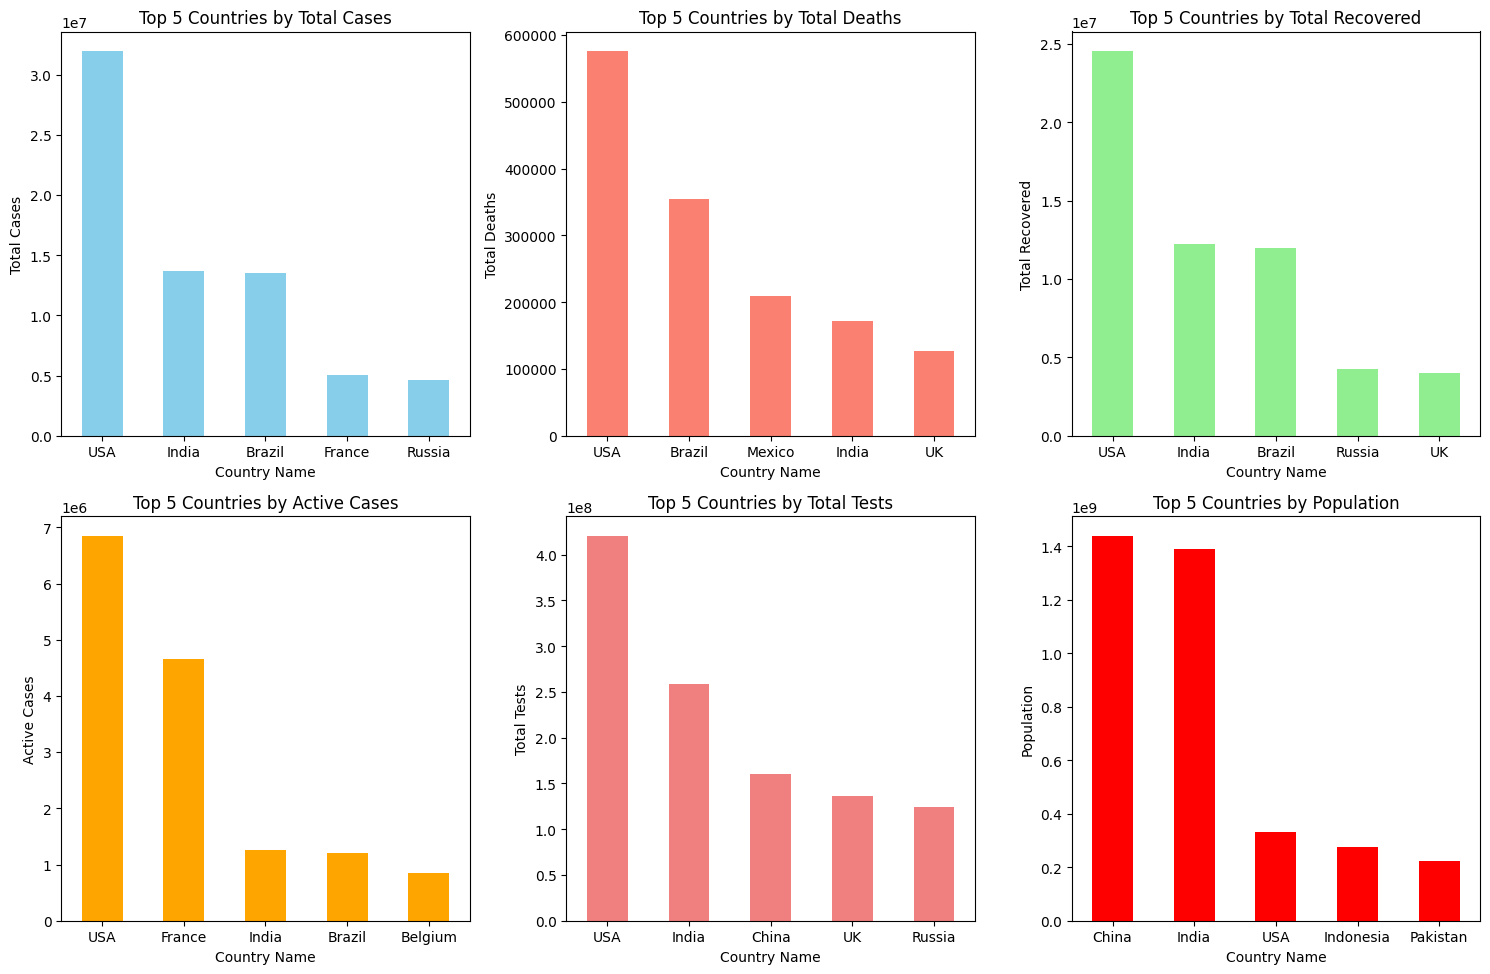

In [10]:
# TODO: draw 6 bar charts

df.set_index('Country Name', inplace=True)
# Plotting the bar charts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df['Total Cases'].nlargest(5).plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 5 Countries by Total Cases')
axes[0, 0].set_ylabel('Total Cases')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

df['Total Deaths'].nlargest(5).plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Top 5 Countries by Total Deaths')
axes[0, 1].set_ylabel('Total Deaths')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

df['Total Recovered'].nlargest(5).plot(kind='bar', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Top 5 Countries by Total Recovered')
axes[0, 2].set_ylabel('Total Recovered')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=0)

df['Active Cases'].nlargest(5).plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Top 5 Countries by Active Cases')
axes[1, 0].set_ylabel('Active Cases')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

df['Total Tests'].nlargest(5).plot(kind='bar', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Top 5 Countries by Total Tests')
axes[1, 1].set_ylabel('Total Tests')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

df['Population'].nlargest(5).plot(kind='bar', ax=axes[1, 2], color='red')
axes[1, 2].set_title('Top 5 Countries by Population')
axes[1, 2].set_ylabel('Population')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

# raise NotImplementedError('not implemented')

**TODO**: Comment about the chart

- USA là quốc gia có tổng số ca nhiễm, tổng số ca tử vong, tổng số người phục hồi, tổng số ca nhiễm đang hoạt động, số lượng xét nghiệm cao nhất trong các quốc gia.
- USA là quốc gia có dân số khoảng 400 triệu, đứng sau China và India nhưng có quy mô bùng phát dịch lớn, tình hình dịch bệnh rất nghiêm trọng, tuy nhiên có hệ thống y tế tốt nên khả năng phục hồi rất hiệu quả, bên cạnh đó mức độ kiểm soát và theo dõi dịch bệnh tại USA đang rất tốt. Tình hình dịch bệnh hiện tại của USA vẫn đang còn rất nhiều ca nhiễm
- China và India là 2 quốc gia có dân số đông nhất, khoảng 1.4 tỷ người, tổng số ca nhiễm, ca tử vong, số người phục hồi, số ca nhiễm đang hoạt động của India nhiều hơn China rất nhiều, về số lượng xét nghiệm thì India vẫn nhiều hơn China. Như vậy dịch bệnh bùng phát ở India nghiêm trọng hơn China
- Brazil cũng là nước có tình hình dịch bệnh bùng phát nghiêm trọng nhưng hiện tại đã có sự chuyển biến tốt hơn, số ca nhiễm còn hoạt động ít và số người phục hồi cũng không ít.
- Russia là nước có tình hình dịch bệnh bùng phát không quá nghiêm trọng và đã dần ổn định, hầu hết số người nhiễm bệnh đã được phục hồi nhờ vào hệ thống y tế hiệu quả và khả năng kiểm soát theo dõi dịch bệnh tốt, hiện tại số ca nhiễm còn hoạt động không nhiều

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which show the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

<ipython-input-11-557abf8ab346>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


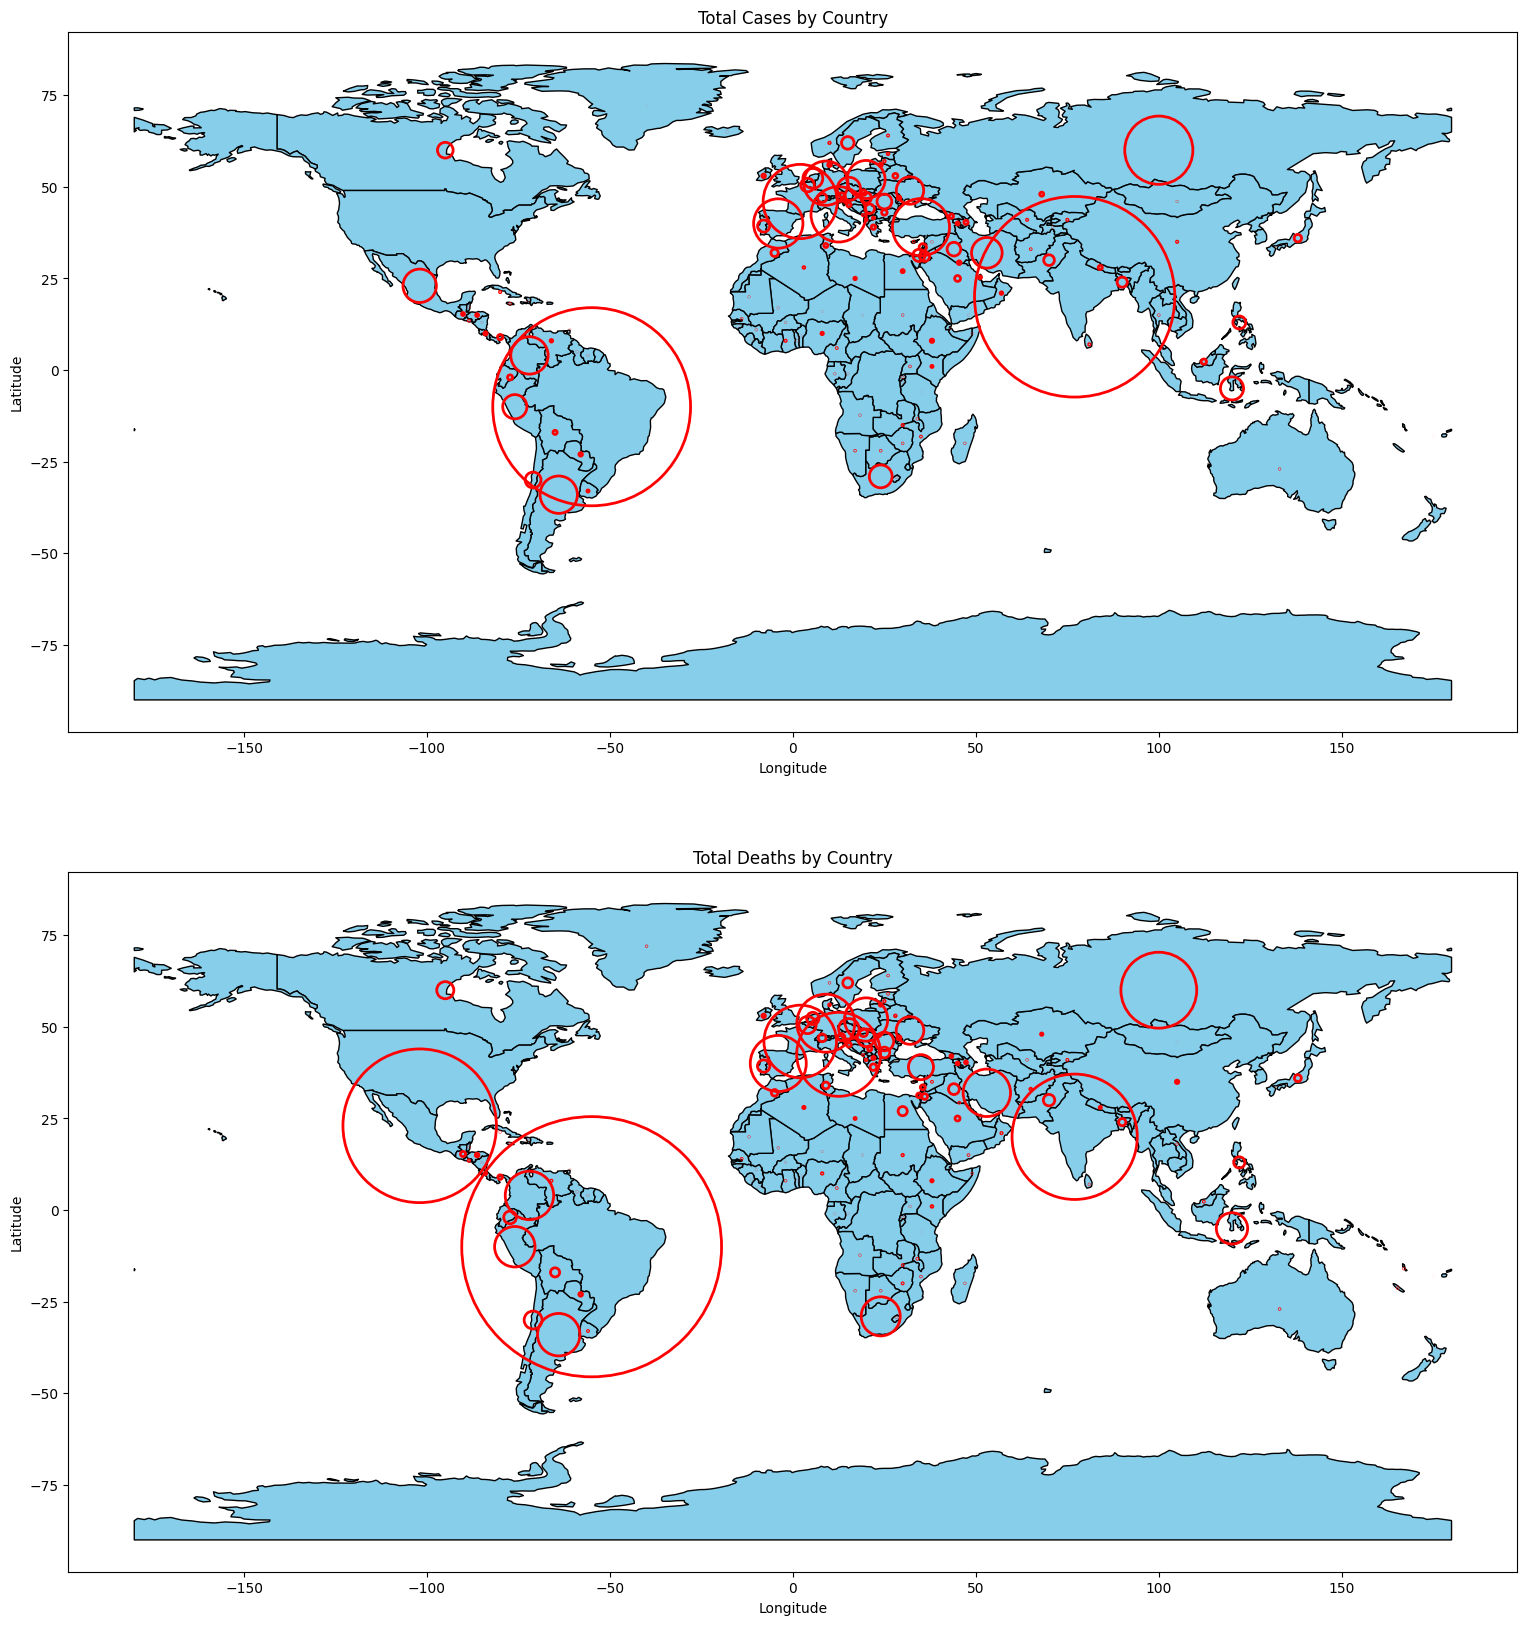

In [11]:
# TODO: draw 2 world map chart using geopandas
# Load the coord.json file
with open('./data/coord.json') as f:
    data = json.load(f)

# Convert the JSON data to a DataFrame
coord_df = pd.DataFrame(data)
# Load the world map data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with the coord data
world = world.merge(coord_df, how='left', left_on='name', right_index=True)
world = world.merge(df[['Total Cases', 'Total Deaths']], how='left', left_on='name', right_index=True)

# Plot the world map with circles for Total Cases
fig, ax = plt.subplots(2, 1, figsize=(60, 20))

world.plot(ax=ax[0], color='skyblue', edgecolor='black')
ax[0].set_title('Total Cases by Country')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')

# Plot the world map with circles for Total Deaths
world.plot(ax=ax[1], color='skyblue', edgecolor='black')
ax[1].set_title('Total Deaths by Country')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')

for index, row in world.iterrows():
    longitude = row['long']
    latitude = row['lat']
    total_cases = row['Total Cases']
    total_deaths = row['Total Deaths']
    circle0 = plt.Circle((longitude, latitude), total_cases*0.000001999, color='red', alpha=1, fill=False, linewidth=2)
    circle1 = plt.Circle((longitude, latitude), total_deaths*0.00009999, color='red', alpha=1, fill=False, linewidth=2)
    ax[0].add_artist(circle0)
    ax[1].add_artist(circle1)

plt.show()
# raise NotImplementedError('not implemented')

**TODO**: Comment about the chart
- Nhiều quốc gia ở vùng kinh độ từ 0 - 50, vĩ độ từ 25 - 60 có tình hình dịch bệnh không quá nghiêm trọng
- Quốc gia ở kinh độ khoảng -60, vĩ độ khoảng -15 có tổng số ca nhiễm và tổng số người chết lớn, tình hình dịch bệnh nghiêm trọng
- Các quốc gia ở vùng vĩ độ dưới -50, hầu hết không có dịch bệnh

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

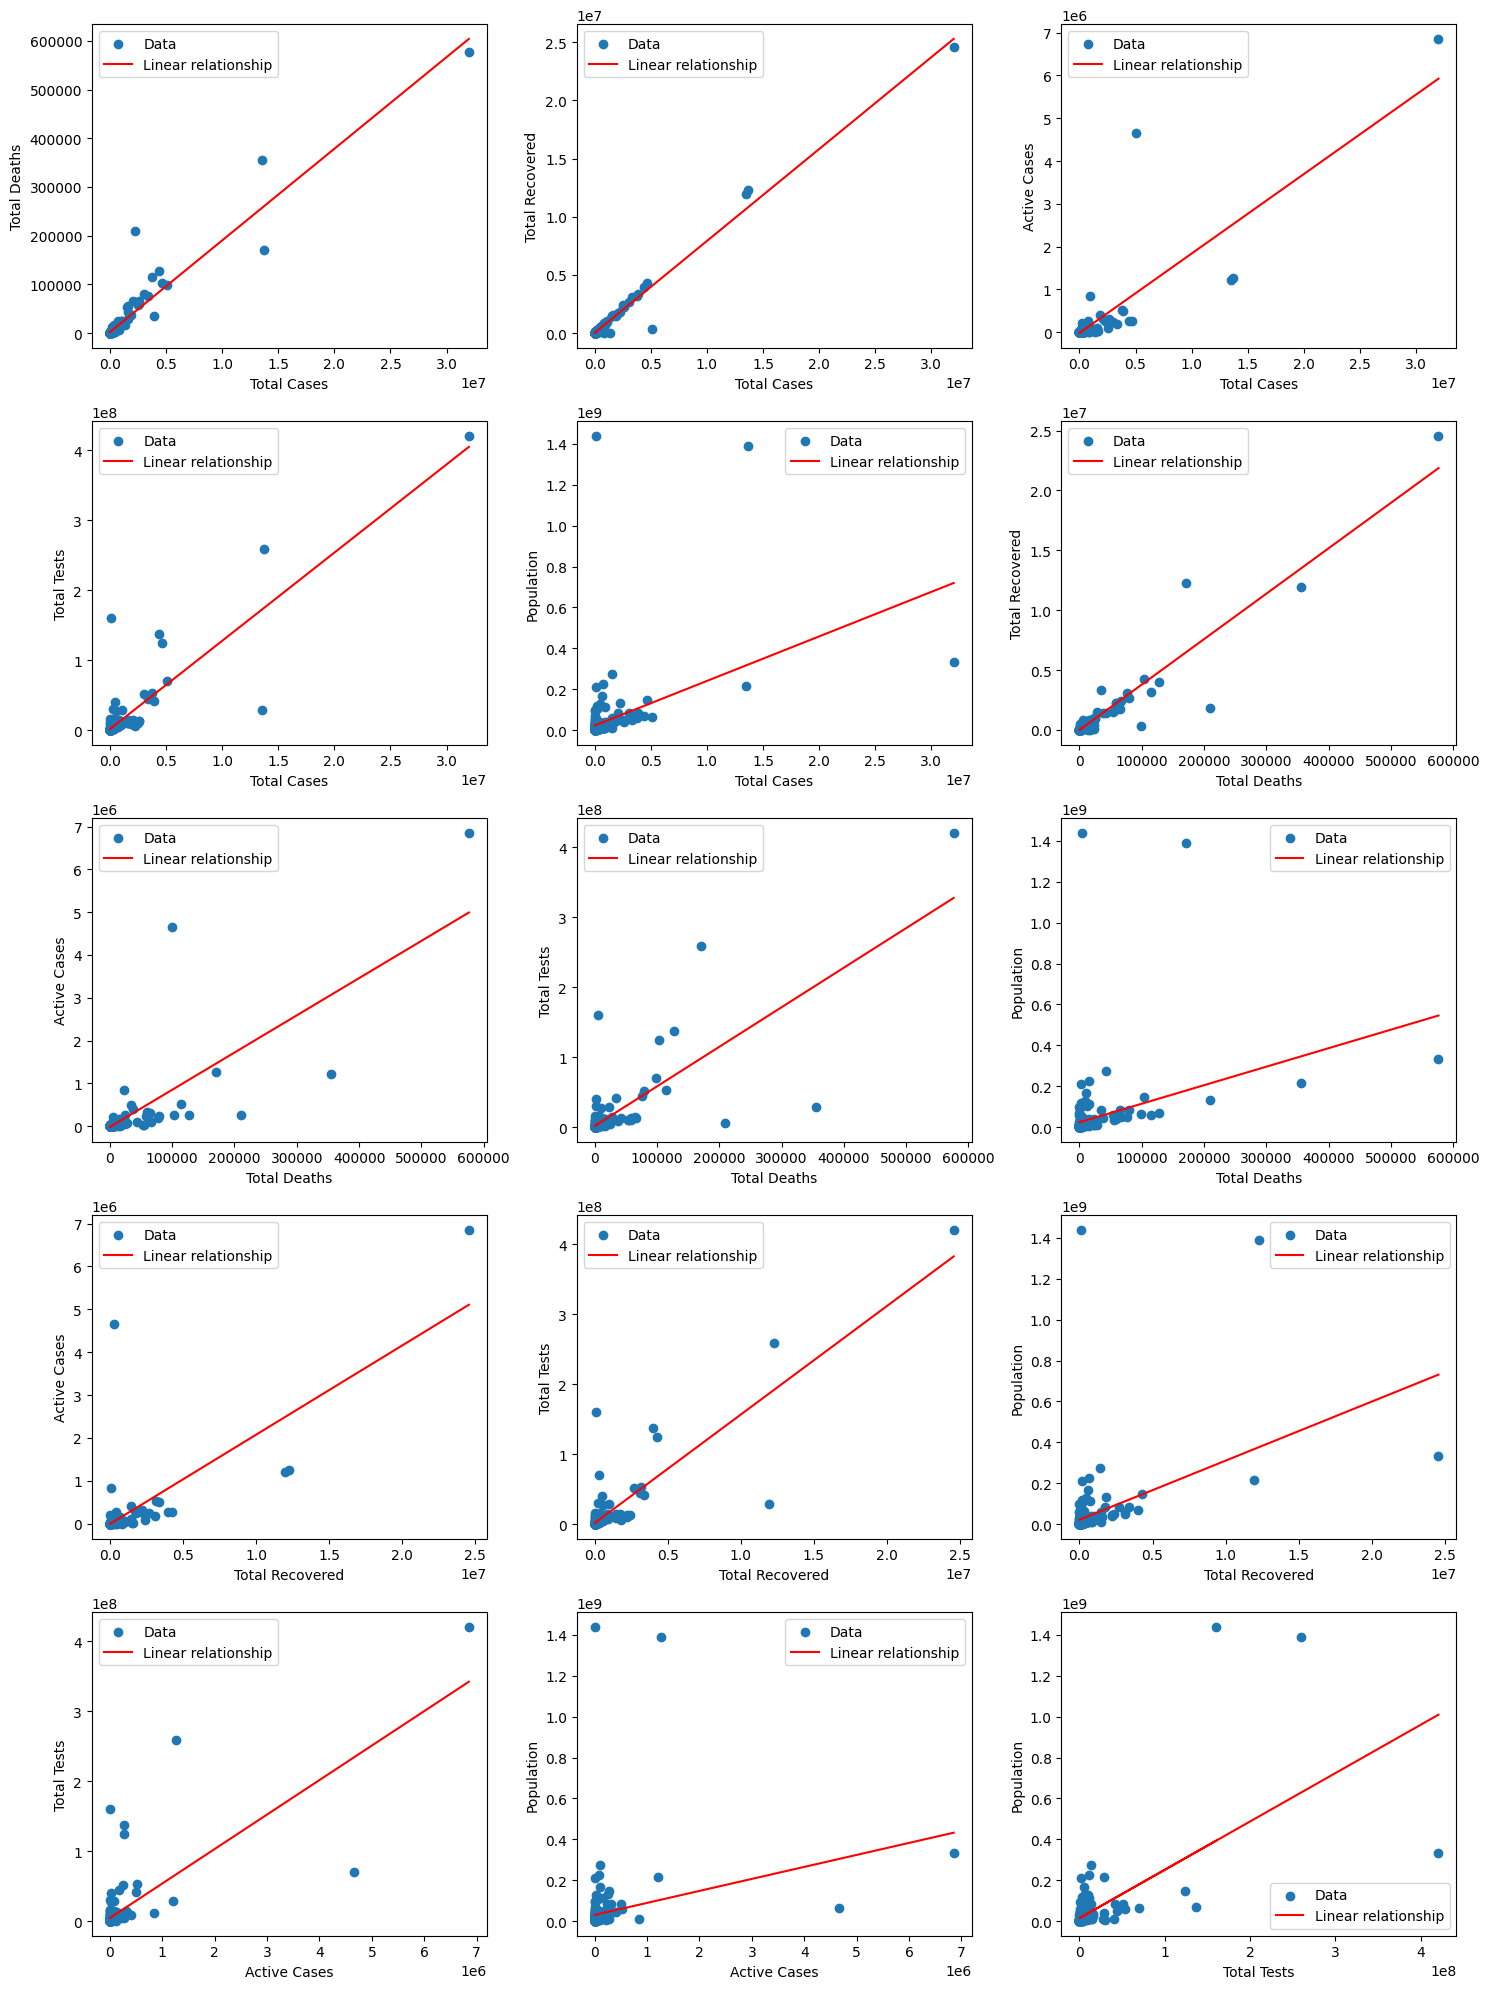

In [12]:
# TODO: scatter stuff
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
variables = df.columns

index = 0
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        x = df.iloc[:, i]
        y = df.iloc[:, j]

        # Tính toán hệ số góc và hệ số tự do của đường thẳng tuyến tính
        mean_x = x.mean()
        mean_y = y.mean()
        std_x = x.std()
        std_y = y.std()
        # Hệ số tương quan
        r = ((x - mean_x) * (y - mean_y)).sum() / (len(x) * std_x * std_y)
        # Hệ số góc
        slope = r * std_y / std_x
        # Hệ số tự do
        intercept = mean_y - slope * mean_x

        # Vẽ biểu đồ phân tán
        ax = axes[index // 3, index % 3]
        ax.scatter(x, y, label='Data')
        ax.set_xlabel(variables[i])
        ax.set_ylabel(variables[j])

        # Vẽ đường thẳng tuyến tính
        ax.plot(x, slope*x + intercept, color='red', label='Linear relationship')
        ax.legend()

        index += 1

plt.tight_layout()
plt.show()
# raise NotImplementedError('not implemented')

**TODO**: As showed above, give your prediction about the relationship between each pair.

- Total Cases và Total Deaths có mối quan hệ đồng biến mạnh
- Total Cases và Total Recovered có mối quan hệ đồng biến mạnh
- Total Cases và Active Cases có mối quan hệ đồng biến mạnh
- Total Cases và Total Tests có mối quan hệ đồng biến mạnh
- Total Cases và Population có mối quan hệ đồng biến vừa
- Total Deaths và Total Recovered có mối quan hệ đồng biến mạnh
- Total Deaths và Active Cases có mối quan hệ đồng biến vừa
- Total Deaths và Total Tests có mối quan hệ đồng biến vừa
- Total Deaths và Population có mối quan hệ đồng biến yếu
- Total Recovered và Active Cases có mối quan hệ đồng biến vừa
- Total Recovered và Total Tests có mối quan hệ đồng biến mạnh
- Total Recovered và Population có mối quan hệ đồng biến vừa
- Active Cases và Total Tests có mối quan hệ đồng biến mạnh
- Active Cases và Population có mối quan hệ đồng biến yếu
- Total Tests và Population có mối quan hệ đồng biến vừa

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

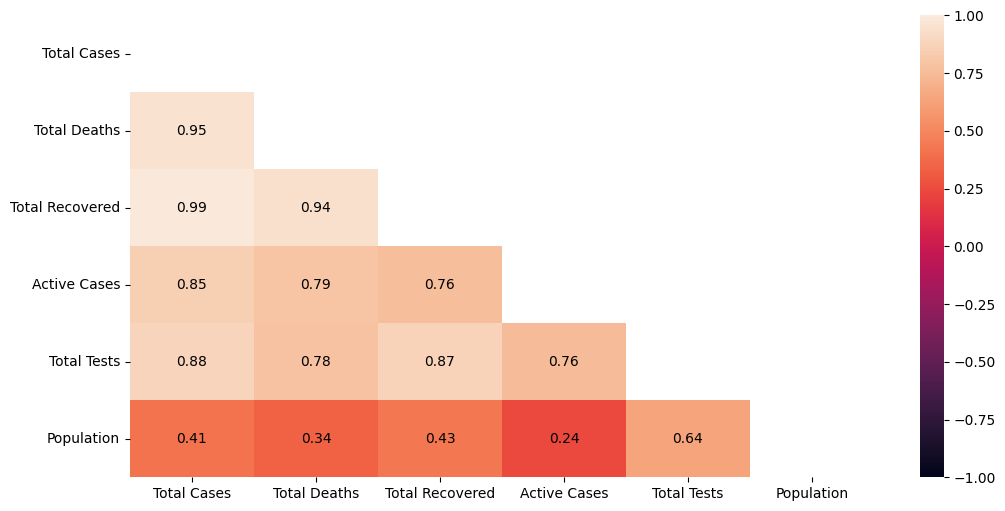

In [13]:
# TODO: create heatamp
# Ma trận hệ số tương quan
corr_matrix = df.corr()

# Tam giác dưới không lấy đường chéo của ma trận hệ số tương quan
corr_values = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype('bool'))

# vẽ biểu đồ heatmap
heatmap = sn.heatmap(corr_values, vmin=-1, vmax=1)
for i in range(len(corr_values)):
    for j in range(len(corr_values)):
        # Kiểm tra giá trị khác NaN
        if not pd.isna(corr_values.iloc[i, j]):
            heatmap.text(j+0.5, i+0.5, '{:.2f}'.format(corr_values.iloc[i, j]), ha='center', va='center', color='black')

plt.xticks(rotation=0)
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()
# raise NotImplementedError('not implemented')

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

- Dataloader trong Pytorch được sử dụng để quản lý và chuẩn bị dữ liệu cho quá trình huấn luyện và kiểm tra mô hình. Nó đem lại nhiều lợi ích sau:
  + Chia dữ liệu thành các batch có kích thước nhất định, giúp mô hình huấn luyện và kiểm tra từng phần dữ liệu một cách hiệu quả
  + Trộn dữ liệu (shuffle): Giúp mô hình học được từ các mẫu dữ liệu đa dạng, giảm thiểu sự ảnh hưởng của thứ tự dữ liệu đến quá trình học
  + Dataloader tạo ra các vòng lặp cho việc huấn luyện và kiểm tra mô hình, giúp dễ truy cập và sử dụng dữ liệu trong quá trình huấn luyện

In [14]:
# TODO: download training, testing data and store them into training_data and testing_data
training_data = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
testing_data = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())
# Then, create train_dataloader and test_dataloader with batch_size=32
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=32, shuffle=False)
# raise NotImplementedError('not implemented')

100%|██████████| 9912422/9912422 [00:00<00:00, 72412503.41it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24241683.78it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 57445252.52it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15627997.35it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

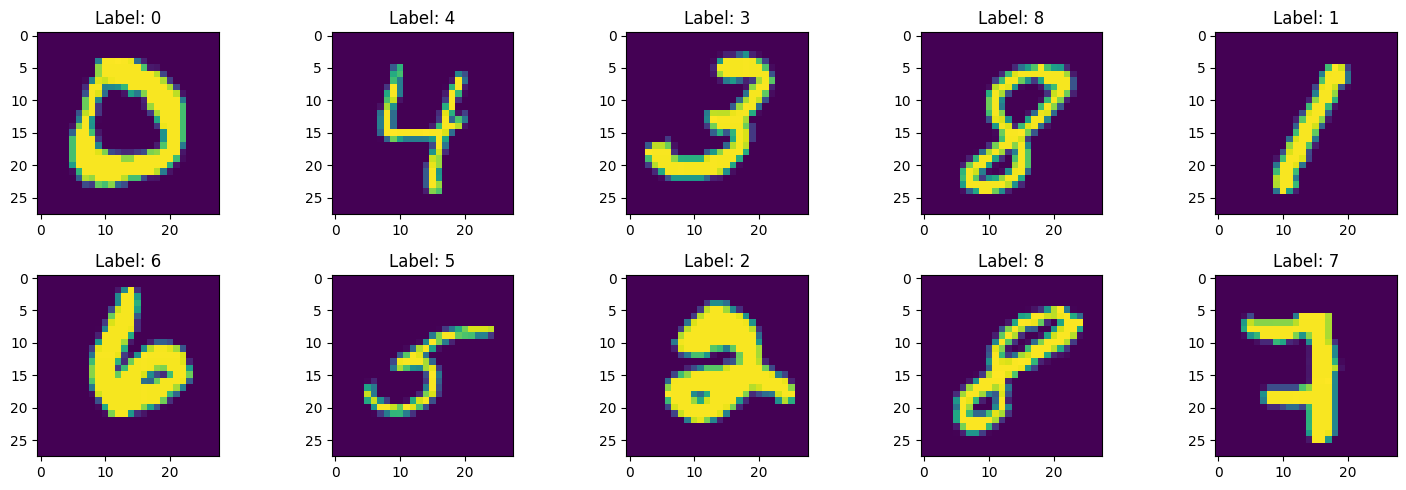

In [15]:
# TODO: visualize 10 random samples
# raise NotImplementedError('not implemented')
# Choose 10 random indices from the training dataset
indices = np.random.choice(len(training_data), 10, replace=False)

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

# Plot each of the 10 random samples
for i, idx in enumerate(indices):
    # Get the image and label from the dataset
    img, label = training_data[idx]

    # Convert the tensor image to a NumPy array for plotting
    img = img.numpy().squeeze()

    # Get the corresponding subplot row and column
    row = i // 5
    col = i % 5

    # Plot the image in the subplot
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'Label: {label}')
    axes[row, col].set_yticks(range(0, 26, 5))

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [16]:
# TODO: create Mnist_FC and Mnist_CNN
# raise NotImplementedError('not implemented')

import torch.nn.functional as F

# Model Fully Connected
class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

# Model Convolutional Meural Network
class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5) # Lớp convolution đầu tiên
        self.conv2 = nn.Conv2d(20, 20, 5) # Lớp convolution thứ hai
        self.fc = nn.Linear(20*4*4, 10) # Lớp tuyến tính

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 20*4*4)
        x = F.log_softmax(self.fc(x), dim=1)
        return x

# Tạo Model Fully Connected và CNN
mnist_fc_model = Mnist_FC()
mnist_cnn_model = Mnist_CNN()


### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

- Hàm `train(dataloader, model, loss_fn, optimizer)`:
  + `dataloader`: Dữ liệu đầu vào được sử dụng để huấn luyện mô hình, thường là dữ liệu được chia thành các batch
  + `model`: Mô hình máy học cần được huấn luyện.
  + `loss_fn`: Hàm mất mát được sử dụng để đo lường sự khác biệt giữa giá trị dự đoán và giá trị thực tế.
  + `optimizer`: Thuật toán tối ưu hóa được sử dụng để cập nhật trọng số của mô hình dựa trên đạo hàm của hàm mất mát

- Hàm `test(dataloader, model)`:
  + `dataloader`: Dữ liệu đầu vào được sử dụng để kiểm tra hiệu suất của mô hình, ở đây là dữ liệu kiểm tra.
  + `model`: Mô hình máy học cần được kiểm tra.

- Trong hàm `test`, dòng code `torch.no_grad()` được sử dụng để tắt tính toán đạo hàm trong quá trình kiểm tra. Khi tính toán đạo hàm, PyTorch cần lưu trữ các giá trị trung gian để tính toán đạo hàm ngược (backpropagation). Tuy nhiên, trong quá trình kiểm tra, chúng ta không cần tính toán đạo hàm nên việc tắt tính toán đạo hàm sẽ giúp tiết kiệm tài nguyên tính toán và bộ nhớ. Điều này cũng giúp tăng tốc quá trình kiểm tra mô hình.

In [17]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    # raise NotImplementedError('not implemented')
    model.train()  # Chuyển sang chế độ huấn luyện
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (data, target) in  enumerate(dataloader):
        optimizer.zero_grad()  # Đặt gradients về 0
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()  # Lan truyền ngược
        optimizer.step()  # Cập nhật trọng số
        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    accuracy = 100. * correct / total
    avg_loss = train_loss / len(dataloader)

    return avg_loss, accuracy


def test(dataloader, model):
    # raise NotImplementedError('not implemented')
    model.eval()  # Chuyển sang chế độ đánh giá
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (data, target) in  enumerate(dataloader):
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    accuracy = 100. * correct / total
    avg_loss = test_loss / len(dataloader.dataset)

    return avg_loss, accuracy


# raise NotImplementedError('not implemented')

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

...

In [18]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer_fc = torch.optim.SGD(mnist_fc_model.parameters(), lr=learning_rate)
optimizer_cnn = torch.optim.SGD(mnist_cnn_model.parameters(), lr=learning_rate)

# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
# raise NotImplementedError('not implemented')

# Training and testing loop for Mnist_FC
print('========== FC model ==========')
history_fc = {'train_acc': [], 'test_acc': []}
for epoch in range(20):
    train_result = train(train_dataloader, mnist_fc_model, loss_fn, optimizer_fc)
    train_acc = train_result[1]/100
    history_fc['train_acc'].append(train_acc)

    test_result = test(test_dataloader, mnist_fc_model)
    test_acc = test_result[1]/100
    history_fc['test_acc'].append(test_acc)

    print(f"Epoch {epoch+1}/{20}, Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")

# Training and testing loop for Mnist_CNN
print('========== CNN model ==========')
history_cnn = {'train_acc': [], 'test_acc': []}
for epoch in range(20):
    train_result = train(train_dataloader, mnist_cnn_model, loss_fn, optimizer_cnn)
    train_acc = train_result[1]/100
    history_cnn['train_acc'].append(train_acc)

    test_result = test(test_dataloader, mnist_cnn_model)
    test_acc = test_result[1]/100
    history_cnn['test_acc'].append(test_acc)

    print(f"Epoch {epoch+1}/{20}, Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")

========== FC model ==========
Epoch 1/20, Train Acc: 0.429, Test Acc: 0.644
Epoch 2/20, Train Acc: 0.676, Test Acc: 0.706
Epoch 3/20, Train Acc: 0.731, Test Acc: 0.779
Epoch 4/20, Train Acc: 0.799, Test Acc: 0.831
Epoch 5/20, Train Acc: 0.835, Test Acc: 0.854
Epoch 6/20, Train Acc: 0.856, Test Acc: 0.869
Epoch 7/20, Train Acc: 0.871, Test Acc: 0.880
Epoch 8/20, Train Acc: 0.880, Test Acc: 0.890
Epoch 9/20, Train Acc: 0.886, Test Acc: 0.893
Epoch 10/20, Train Acc: 0.891, Test Acc: 0.898
Epoch 11/20, Train Acc: 0.895, Test Acc: 0.901
Epoch 12/20, Train Acc: 0.898, Test Acc: 0.903
Epoch 13/20, Train Acc: 0.901, Test Acc: 0.905
Epoch 14/20, Train Acc: 0.903, Test Acc: 0.908
Epoch 15/20, Train Acc: 0.905, Test Acc: 0.909
Epoch 16/20, Train Acc: 0.907, Test Acc: 0.911
Epoch 17/20, Train Acc: 0.909, Test Acc: 0.912
Epoch 18/20, Train Acc: 0.911, Test Acc: 0.915
Epoch 19/20, Train Acc: 0.913, Test Acc: 0.917
Epoch 20/20, Train Acc: 0.914, Test Acc: 0.918
========== CNN model ==========
Epoch 

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

- `FC Model`:
  + Đồ thị cho thấy rằng cả training accuracy và testing accuracy đều tăng dần khi số lượng epochs tăng lên. Điều này cho thấy mô hình FC đang học tốt từ dữ liệu và không gặp phải tình trạng overfitting
  + Testing accuracy duy trì ở mức cao và gần với training accuracy, cho thấy mô hình không bị overfitting và có khả năng tổng quát hóa tốt.
- `CNN Model`:
  + Đồ thị cho thấy rằng cả training accuracy và testing accuracy đều tăng dần khi số lượng epochs tăng lên. Điều này cho thấy mô hình FC đang học tốt từ dữ liệu và không gặp phải tình trạng overfitting
  + Testing accuracy duy trì ở mức cao và gần với training accuracy, cho thấy mô hình không bị overfitting và có khả năng tổng quát hóa tốt.

- Tóm lại, cả 2 mô hình đều hoạt động tốt và tiến triển tích cực trong quá trình huấn luyện nhưng nhìn chung thì mô hình CNN có khả năng học tập tốt hơn, training accuracy và testing accuracy tăng nhanh hơn và duy trì ở mức cao hơn mô hình FC

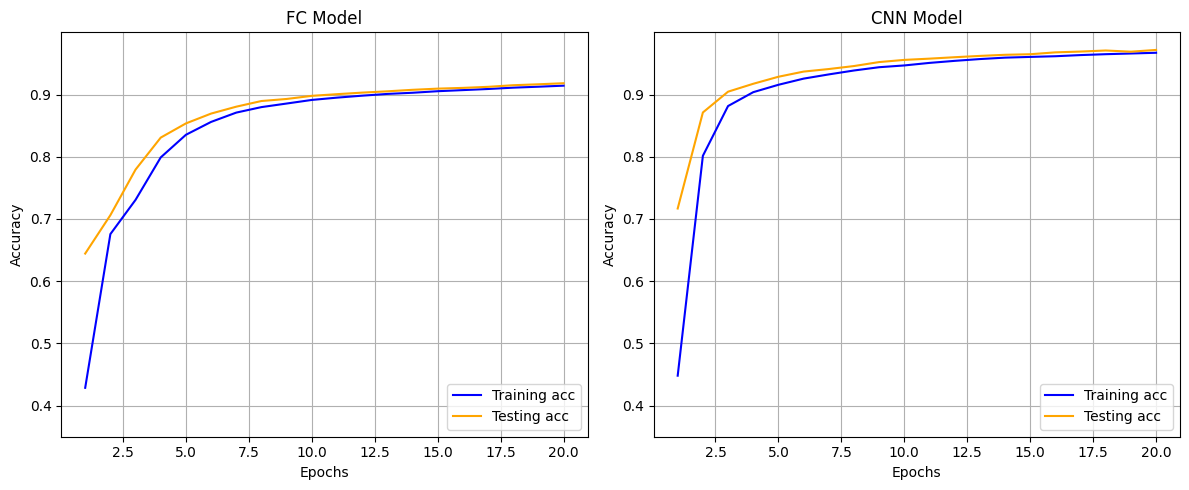

In [73]:
# TODO: visualize the history
# raise NotImplementedError('not implemented')

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Vẽ đồ thị cho Mnist_FC
ax[0].plot(range(1,21), history_fc['train_acc'], label='Training acc', color='blue')
ax[0].plot(range(1,21), history_fc['test_acc'], label='Testing acc', color='orange')
ax[0].set_title('FC Model')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.35, 1.0)
ax[0].set_yticks(np.arange(0.4, 1.0, 0.1))
ax[0].grid(True)
ax[0].legend(loc='lower right')

# Vẽ đồ thị cho Mnist_CNN
ax[1].plot(range(1, 21), history_cnn['train_acc'], label='Training acc', color='blue')
ax[1].plot(range(1, 21), history_cnn['test_acc'], label='Testing acc', color='orange')
ax[1].set_title('CNN Model')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0.35, 1.0)
ax[1].set_yticks(np.arange(0.4, 1.0, 0.1))
ax[1].grid(True)
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` using Colab